# Домашнее задание

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
from sklego.preprocessing import RepeatingBasisFunction

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

При помощи seaborn хочу визуализировать корреляцию между параметрами

<Axes: >

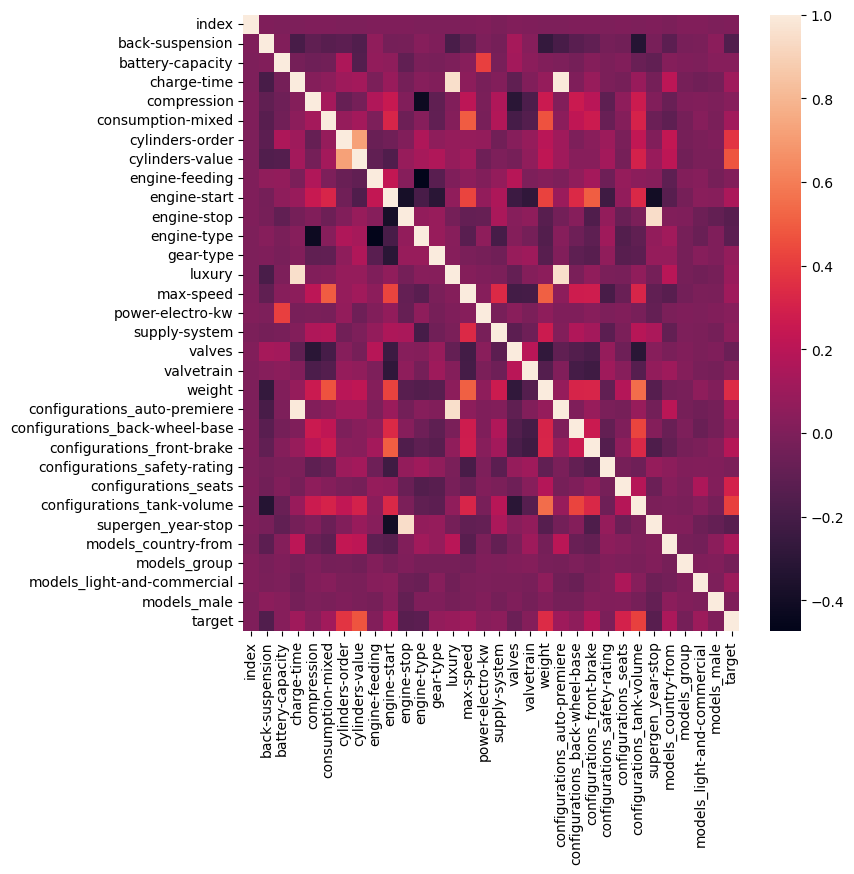

In [4]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

Хочу вывести отдельно корреляцию для столбца target

In [5]:
df.corr()[['target']].sort_values(by = 'target', ascending = False)

,target
target,1.000000
cylinders-value,0.472177
configurations_tank-volume,0.413853
cylinders-order,0.376272
weight,0.339835
configurations_seats,0.298625
configurations_front-brake,0.184791
engine-start,0.150944
models_country-from,0.148848
consumption-mixed,0.118195


Я попыталась уменьшить mse при помощи удаления столбцов, которые либо не коррелируют с target, либо коррелируют между собой.
Как результат модель немного улучшилась (было 31021, а стало 31012)

In [6]:
X = df.drop(["target",'models_male','index','back-suspension','cylinders-order','supergen_year-stop'], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
train_X

,battery-capacity,charge-time,compression,consumption-mixed,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,...,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,models_country-from,models_group,models_light-and-commercial
22607,-1.0,11636,9.5,-1.0,4,4,1997,2000,2,0,...,1290.0,11642,1415.0,4,2,13,50.0,16,3,0
36531,-1.0,31764,9.0,-1.0,4,0,1990,1993,2,1,...,935.0,31785,1310.0,1,2,13,48.0,23,3,0
24048,-1.0,2773,8.8,6.8,4,4,2009,2012,2,1,...,1373.0,2763,1558.0,4,1,13,56.0,10,3,0
34819,-1.0,52039,14.0,5.3,4,5,2015,2017,0,1,...,1430.0,52081,1590.0,4,2,13,56.0,16,3,0
1328,-1.0,20689,18.0,7.5,5,5,2004,2005,0,1,...,1485.0,20685,1560.0,4,2,13,70.0,28,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-1.0,42729,16.5,4.7,4,5,2017,0,0,2,...,1655.0,42742,1630.0,4,2,13,68.0,10,3,0
11284,-1.0,46093,8.1,-1.0,7,0,1987,1990,2,0,...,-1.0,46131,1486.0,4,2,13,82.0,34,3,0
38158,-1.0,48819,10.0,7.6,4,2,2018,0,2,0,...,1562.0,48858,1636.0,4,2,13,62.0,26,3,0
860,-1.0,9346,22.4,-1.0,4,6,1992,1995,0,1,...,-1.0,9412,1460.0,1,2,13,50.0,16,3,0


In [8]:
reg = LinearRegression().fit(train_X, train_y)

In [9]:
reg.score(train_X, train_y)

0.4552511257523898

In [10]:
reg.score(test_X, test_y)

0.4647724108938097

In [11]:
mean_squared_error(reg.predict(train_X), train_y)

29855.990736197968

In [12]:
mean_squared_error(reg.predict(test_X), test_y)

31012.44820137397